In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import binned_statistic_2d

import montera.cno_lib as cno_lib

In [3]:
snr_filenames = cno_lib.get_fname_list(
    '240126_NoAnt_N/gen_data/snr_csv_and_elev_table/P4-05-all',
    '_block_data.csv')    
dfs = []
for f in snr_filenames:
    df = cno_lib.load_snr_block(f)
    if df.empty:
        continue
    #print(df)
    #sys.exit()
    dfs.append(df)

In [48]:
FIGSIZE = (10, 5)
def mesh_bins(df, x_col='az', y_col='elev', z_col='CNo', bin_incr=5):
    """
    Collect average C/No Differences (Z values) over (default=5 degree) bins
    for both Az and El.
    """
    x_bins = np.arange(0, 360+bin_incr, bin_incr)
    y_bins = np.arange(0, 90+bin_incr, bin_incr)

    mesh = binned_statistic_2d(     
        df[x_col], df[y_col], df[z_col],
        statistic=np.mean,
        bins=[x_bins, y_bins]
    )
    XX, YY = np.meshgrid(mesh.x_edge, mesh.y_edge)

    return (XX, YY, mesh)


def az_el_mesh_plot(
    XX,
    YY,
    mesh,
    fname,
    vmin=0,
    vmax=50,
    cmap=plt.get_cmap('jet'),
    ylim=[0,90],
):
    """
    Plot the mesh output from mesh_bins()
    """
    fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
    pcm = ax.pcolormesh(
        XX, YY, mesh.statistic.T,
        cmap=cmap,
        vmin=vmin,
        vmax=vmax
    )

    plt.xlabel('Azimuth (deg)')
    plt.ylabel('Elevation (deg)')
    plt.xticks(np.arange(0, 360+45, 45))
    plt.yticks(np.arange(0, 90+15, 15))
    plt.colorbar(pcm, ax=ax, label='C/No (dB)')
    #plt.title(os.path.splitext(os.path.basename(fname))[0])
    plt.ylim(ylim)
    #print(f"Saving: {fname}")
    #plt.savefig(fname)
    #plt.close(fig)

In [22]:
df_all = pd.concat(dfs)
antenna=0
df_ant = df_all.query(f'antenna=={antenna}')
display(df_ant)

Week      Time  antenna  id_type  SV  elev      az  block_type  \
0        2298  425921.0        0       10  45  82.0  315.50           6   
1        2298  425921.0        0       10  36  41.0  129.50           6   
2        2298  425921.0        0       10  30  34.0   47.75           6   
3        2298  425921.0        0       10  29  81.0  152.50           6   
4        2298  425921.0        0       10  26  25.0  310.50           6   
...       ...       ...      ...      ...  ..   ...     ...         ...   
1962091  2298  512855.0        0        3  13  57.0  118.25           2   
1962092  2298  512855.0        0       10  29  29.0  219.25           2   
1962093  2298  512855.0        0        3  19  15.0  239.00           2   
1962094  2298  512855.0        0        3  21  73.0    1.50           2   
1962095  2298  512855.0        0       10  30  83.0  161.50           2   

         Track  cycle_slip        CNo       name   SVType    Freq  adj_time  
0           26           1  49.799999  P4-05-all   BeiDou      B1  425921.0  
1           26           1  45.700001  P4-05-all   BeiDou      B1  425921.0  
2           26           1  43.900002  P4-05-all   BeiDou      B1  425921.0  
3           26           1  49.200001  P4-05-all   BeiDou      B1  425921.0  
4           26           1  42.599998  P4-05-all   BeiDou      B1  425921.0  
...        ...         ...        ...        ...      ...     ...       ...  
1962091     11           0  46.900002  P4-05-all  Galileo  L5/E5A  512855.0  
1962092      8           0  45.000000  P4-05-all   BeiDou  L5/E5A  512855.0  
1962093     11           0  38.200001  P4-05-all  Galileo  L5/E5A  512855.0  
1962094     11           0  47.099998  P4-05-all  Galileo  L5/E5A  512855.0  
1962095      8           0  48.400002  P4-05-all   BeiDou  L5/E5A  512855.0  

[11690728 rows x 15 columns]

(19, 73) (19, 73) (18, 72)
30.08026737486633 50.55169544013845


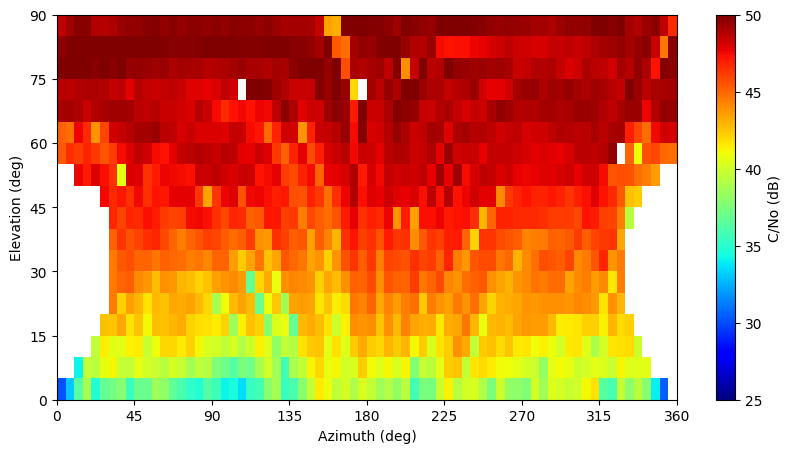

In [55]:
#png_fname = os.path.join(fig_dir, f'{args.dut_dir}_{antenna}_az_el.png')
XX, YY, mesh = mesh_bins(df_ant)
print(XX.shape, YY.shape, mesh.statistic.T.shape)
print(np.nanmin(mesh.statistic.T), np.nanmax(mesh.statistic.T))
az_el_mesh_plot(
    XX, YY, mesh,
    'P4-05-all_0.png',
    vmin=25,
    #vmax,
    #cmap=plt.get_cmap('jet'),
    #ylim=[0,90],
)